# Read data path and check files

In [6]:
train_data_path = "car_data/train/"
test_data_path = "car_data/test/"
valid_data_path = "car_data/valid/"

In [7]:
print(train_data_path)

car_data/train/


In [8]:
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from skimage import io
from collections import Counter
import random
import numpy as np
import matplotlib.pyplot as plt

size of image (h x w) 640 640


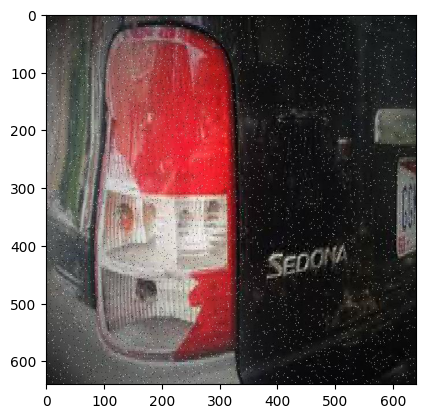

In [9]:
img = plt.imread(os.path.join(train_data_path, "sign_light--19-_jpg.rf.9170ffdd1abc3028910d4592a6aa9984.jpg"))
plt.imshow(img)
height, width, dim = img.shape
print("size of image (h x w)",height,width)

# Data Preprocessing

In [10]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

import os
# import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image


# Removing duplicate images

In [11]:
def remove_duplicates(directory):
    seen_images = set()
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        # Check if the path points to a file
        if os.path.isfile(file_path):
            with open(file_path, 'rb') as f:
                image_hash = hash(f.read())
                if image_hash in seen_images:
                    os.remove(file_path)
                else:
                    seen_images.add(image_hash)

# Apply to train, test, and valid directories
remove_duplicates(train_data_path)
remove_duplicates(test_data_path)
remove_duplicates(valid_data_path)

# Handling Missing or corrupted images


In [12]:
def remove_invalid_images(directory):
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        try:
            # Skip non-image files
            if not is_valid_image(file_path):
                continue

            img = io.imread(file_path)
        except Exception as e:
            print(f"Error reading {file_path}: {e}")
            os.remove(file_path)

# Function to check if a file is a valid image
def is_valid_image(file_path):
    valid_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff']
    return any(file_path.lower().endswith(ext) for ext in valid_extensions)

# Apply to train, test, and valid directories
remove_invalid_images(train_data_path)
remove_invalid_images(test_data_path)
remove_invalid_images(valid_data_path)

# Loading Images

In [13]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)
valid = ImageDataGenerator(rescale=1/255)

img_width, img_height = 640, 640

nb_train_samples = 2000
nb_validation_samples = 800
nb_epoch = 50

train_dataset = train.flow_from_directory(directory = 'car_data/',classes = ['train']
                                         ,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='binary')

test_dataset = test.flow_from_directory(directory = 'car_data/',classes = ['test']
                                       ,
        target_size=(img_width, img_height),
        batch_size=16,
        class_mode='binary')

valid_dataset = test.flow_from_directory(directory = 'car_data/',classes = ['valid']
                                        ,
        target_size=(img_width, img_height),
        batch_size=16,
        class_mode='binary',
        shuffle=True)

Found 3356 images belonging to 1 classes.
Found 80 images belonging to 1 classes.
Found 390 images belonging to 1 classes.


Train model

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

2023-11-19 18:01:00.253572: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
# dimensions of our images.
img_width, img_height = 640, 640

nb_train_samples = 2000
nb_validation_samples = 800
nb_epoch = 5


model = Sequential()
model.add(Conv2D(32, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(img_width, img_height,3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(32, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(32, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(32, (3, 3), strides=1, padding="same", activation="relu"))
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(32, (3, 3), strides=1, padding="same", activation="relu"))
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(32, (3, 3), strides=1, padding="same", activation="relu"))
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation="sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 640, 640, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 640, 640, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 320, 320, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 320, 320, 32)      9248      
                                                                 
 dropout_2 (Dropout)         (None, 320, 320, 32)      0         
                                                                 
 batch_normalization_4 (Batc  (None, 320, 320, 32)    

In [16]:
from keras.layers import Dense,Activation,Dropout, Conv2D, MaxPool2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=1, min_delta=0.001)
modelcheck = ModelCheckpoint('best_model.hdf5', monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')

In [17]:
# Number of training and validation samples
nb_train_samples = 2000
nb_validation_samples = 800
batch_size = 32

# Calculate steps per epoch based on the total number of samples and batch size
steps_per_epoch = nb_train_samples // batch_size

# Train the model
history = model.fit(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    epochs=nb_epoch,
    validation_data=valid_dataset,
    # validation_steps=nb_validation_samples // batch_size,
)

Epoch 1/5
62/62 [==============================] - 2098s 34s/step - loss: 0.0064 - accuracy: 0.9980 - val_loss: 8.4414e-07 - val_accuracy: 1.0000
Epoch 2/5
62/62 [==============================] - 1945s 31s/step - loss: 9.6550e-28 - accuracy: 1.0000 - val_loss: 8.5682e-11 - val_accuracy: 1.0000
Epoch 3/5
62/62 [==============================] - 2196s 35s/step - loss: 3.7053e-35 - accuracy: 1.0000 - val_loss: 1.6050e-13 - val_accuracy: 1.0000
Epoch 4/5
62/62 [==============================] - 1951s 31s/step - loss: 2.7341e-29 - accuracy: 1.0000 - val_loss: 4.2096e-15 - val_accuracy: 1.0000
Epoch 5/5
62/62 [==============================] - 2000s 32s/step - loss: 1.2227e-32 - accuracy: 1.0000 - val_loss: 7.5103e-16 - val_accuracy: 1.0000


In [18]:
model.save('car_model.hdf5')

In [19]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

In [20]:
import tensorflow as tf
# opening and store file in a variable

json_file = open('model.json','r')
loaded_model_json = json_file.read()
json_file.close()

# use Keras model_from_json to make a loaded model

loaded_model = tf.keras.models.model_from_json(loaded_model_json)

# load weights into new model

loaded_model.load_weights("model.h5")
print("Loaded Model from disk")

# compile and evaluate loaded model

loaded_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


Loaded Model from disk


In [21]:
def get_model():
    global model
    model = load_model('car_model')
    print("Model loaded!")

In [22]:
def load_image(img_path):

    img = image.load_img(img_path)
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    return img_tensor

def prediction(img_path):
    new_image = load_image(img_path)

    pred = model.predict(new_image)

    print(pred)

    labels=np.array(pred)
    labels[labels>=0.6]=1
    labels[labels<0.6]=0

    print(labels)
    final=np.array(labels)

    if final[0][0]==1:
        return "Bad"
    else:
        return "Good"

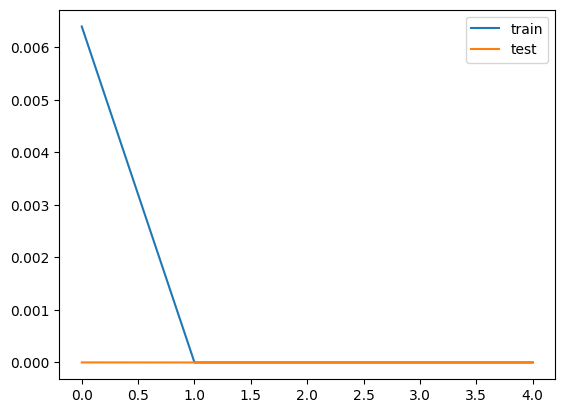

In [23]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [24]:
if 'val_accuracy' in history.history and len(history.history['val_accuracy']) >= 2:
    print('Test accuracy achieved', history.history['val_accuracy'][-2])
else:
    print('Validation accuracy data not available or not enough epochs.')

Test accuracy achieved 1.0


In [25]:
model.evaluate_generator(generator=valid_dataset,
steps=32)

/var/folders/z0/g8wkc4dd4bndfdr7zbnl4d_00000gn/T/ipykernel_82243/872830986.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(generator=valid_dataset,


[7.510337799629646e-16, 1.0]

# Predict the Model

In [26]:
test_dataset.reset()
pred=model.predict_generator(test_dataset,
steps=64,
verbose=1)
predicted_class_indices=np.argmax(pred,axis=1)


/var/folders/z0/g8wkc4dd4bndfdr7zbnl4d_00000gn/T/ipykernel_82243/4158131660.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred=model.predict_generator(test_dataset,


64/64 [==============================] - 17s 200ms/step


In [27]:
predicted_class_indices

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [28]:
labels = (train_dataset.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [29]:
import pandas as pd
filenames=test_dataset.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results.csv",index=False)

# Validate Model Output


1/1 [==============================] - 0s 331ms/step
[[0.]]


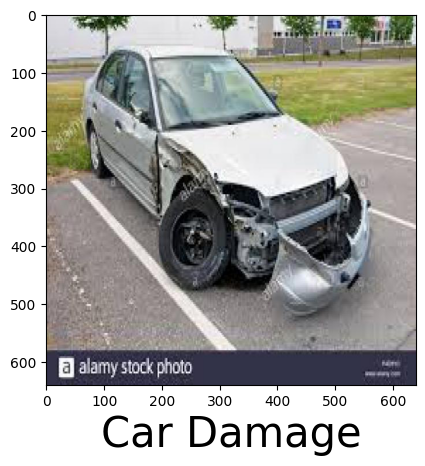

In [30]:
def predictImage(filename):

    img = image.load_img(filename)
    plt.imshow(img)

    Y = image.img_to_array(img)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val < 0.5:
        plt.xlabel("Car Damage",fontsize=30)
    elif val >= 0.5:
        plt.xlabel("Car Not Damage",fontsize=30)


u = 'car_data/valid/oct-6---80-_jpg.rf.589f871da0d1a7c12a8a24aeb0d56584.jpg'

predictImage(u)